## Question 3

### Support Vector Machine (SVM) : Perform iris data classification using SVM .

## Importing the Libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

## Loading the data

In [8]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df.shape

(150, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Visualizing the data

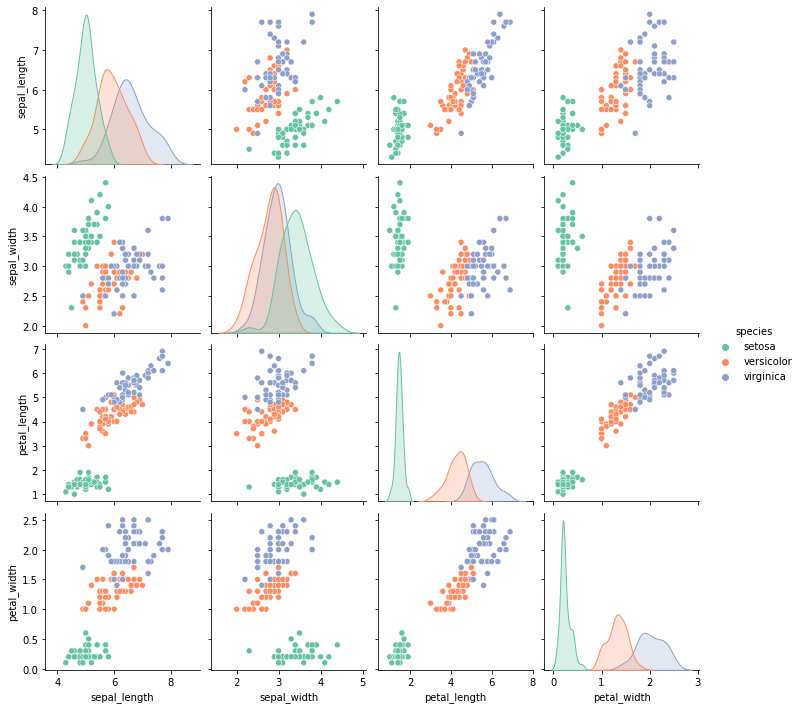

In [13]:
sns.pairplot(data=df, hue='species', palette='Set2')

## Creating a separate target variable

In [14]:
Y = df.species
Y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [15]:
Y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [16]:
Y = Y.map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

## Dropping the target variable: Species

In [17]:
df.drop('species', inplace=True, axis=1)

In [18]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
X = df

# Splitting the dataset into training and test data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

In [22]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (105, 4)
X_test: (45, 4)
y_train: (105,)
y_test: (45,)


## Training SVM classification on training set

In [23]:
from sklearn import svm

In [24]:
classifier = svm.SVC(kernel='linear')

In [25]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

## Predicting the test results

In [26]:
y_pred = classifier.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0], dtype=int64)

## Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

In [28]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


## Accuracy

In [29]:
accuracy_score(y_test, y_pred)

0.9777777777777777

## Model's Report

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Example (Prediction)

In [31]:
def predictor(test):
    pred = classifier.predict(test)
    if pred == 0:
        print("Predicted Species: Setosa")
    elif pred == 1:
        print("Predicted Species: Versicolor")
    elif pred == 2:
        print("Predicted Species: Virginica")

In [32]:
sl = 7.8                                       #Sepal length
sw = 2.0                                       #Sepal width
pl = 5.1                                       #Petal length
pw = 4.2                                       #Petal width
testingVar = np.array([[sl, sw, pl, pw]])
print(testingVar)

[[7.8 2.  5.1 4.2]]


In [33]:
predictor(testingVar)

Predicted Species: Virginica


C:\Users\Shiva\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
